In [5]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import training and validation sets
df = pd.read_csv("/content/drive/MyDrive/ml/data/weather.csv",
                low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      4546 non-null   object 
 1   TMAX      4546 non-null   int64  
 2   TMIN      4546 non-null   int64  
 3   HUMIDITY  4546 non-null   int64  
 4   PRCP      4546 non-null   float64
 5   PRESSURE  4546 non-null   int64  
 6   RAIN      4546 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(1)
memory usage: 217.7+ KB


In [9]:
# Finding how many missing values are there
df.isna().sum()

DATE        0
TMAX        0
TMIN        0
HUMIDITY    0
PRCP        0
PRESSURE    0
RAIN        0
dtype: int64

**NB**: NO MISSING VALUES

In [10]:
# Columns of the data set
df.columns

Index(['DATE', 'TMAX', 'TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE', 'RAIN'], dtype='object')

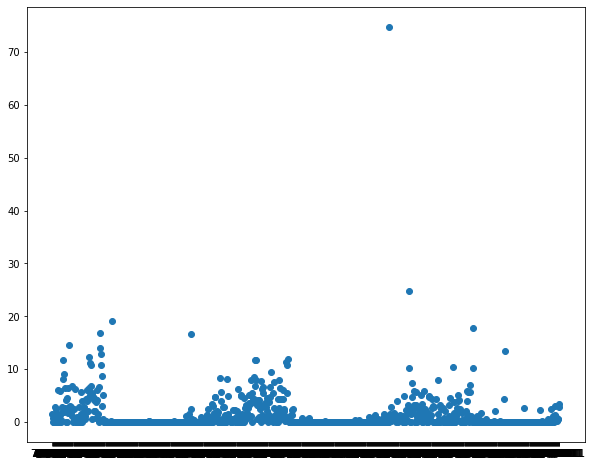

In [11]:
# Plotting saledate vs SalePrice for the first 100 samples
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df["DATE"][:1000], df["PRCP"][:1000]);

In [12]:
df.DATE[:1000]

0       7/1/2008
1       7/2/2008
2       7/3/2008
3       7/4/2008
4       7/5/2008
         ...    
995    3/23/2011
996    3/24/2011
997    3/25/2011
998    3/26/2011
999    3/27/2011
Name: DATE, Length: 1000, dtype: object

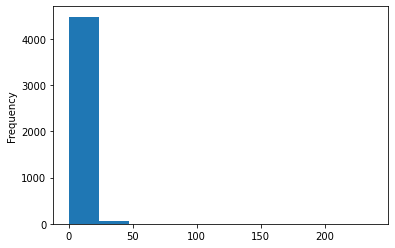

In [13]:
# Plotting PRCP in histogram
df.PRCP.plot.hist();

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [14]:
# Import data again but this time parse dates
df = pd.read_csv("/content/drive/MyDrive/ml/data/weather.csv",
                low_memory=False,
                parse_dates=["DATE"])

In [15]:
df.DATE.dtype

dtype('<M8[ns]')

In [16]:
df.DATE[:1000]

0     2008-07-01
1     2008-07-02
2     2008-07-03
3     2008-07-04
4     2008-07-05
         ...    
995   2011-03-23
996   2011-03-24
997   2011-03-25
998   2011-03-26
999   2011-03-27
Name: DATE, Length: 1000, dtype: datetime64[ns]

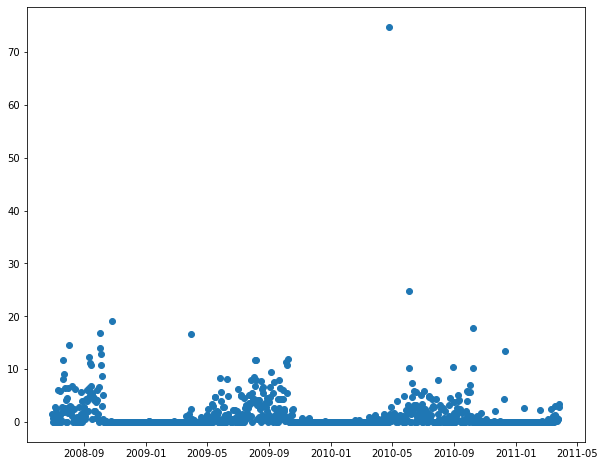

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df["DATE"][:1000], df["PRCP"][:1000]);

In [18]:
df.head()

,DATE,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,RAIN
0,2008-07-01,30,26,94,1.6,1001,True
1,2008-07-02,31,26,93,0.8,1001,True
2,2008-07-03,29,26,95,0.0,1001,False
3,2008-07-04,32,26,91,0.0,1001,False
4,2008-07-05,31,26,93,0.0,1000,False


In [19]:
df.head().T

,0,1,2,3,4
DATE,2008-07-01 00:00:00,2008-07-02 00:00:00,2008-07-03 00:00:00,2008-07-04 00:00:00,2008-07-05 00:00:00
TMAX,30,31,29,32,31
TMIN,26,26,26,26,26
HUMIDITY,94,93,95,91,93
PRCP,1.6,0.8,0,0,0
PRESSURE,1001,1001,1001,1001,1000
RAIN,True,True,False,False,False


In [20]:
df.DATE.head(20)

0    2008-07-01
1    2008-07-02
2    2008-07-03
3    2008-07-04
4    2008-07-05
5    2008-07-06
6    2008-07-07
7    2008-07-08
8    2008-07-09
9    2008-07-10
10   2008-07-11
11   2008-07-12
12   2008-07-13
13   2008-07-14
14   2008-07-15
15   2008-07-16
16   2008-07-17
17   2008-07-18
18   2008-07-19
19   2008-07-20
Name: DATE, dtype: datetime64[ns]

### Sort DataFrame by Date

When working with time series data, it's good to sort it by date

In [21]:
# Sort DataFrame in date order
df.sort_values(by=["DATE"], inplace=True, ascending=True)
df.DATE.head(20)

0    2008-07-01
1    2008-07-02
2    2008-07-03
3    2008-07-04
4    2008-07-05
5    2008-07-06
6    2008-07-07
7    2008-07-08
8    2008-07-09
9    2008-07-10
10   2008-07-11
11   2008-07-12
12   2008-07-13
13   2008-07-14
14   2008-07-15
15   2008-07-16
16   2008-07-17
17   2008-07-18
18   2008-07-19
19   2008-07-20
Name: DATE, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [22]:
# Make a copy of the original DataFrame to perform edits on

df_tmax = df.copy()

# Predicting TMAX

### Add datetime parameters for date column

In [23]:
df_tmax["Year"] = df_tmax.DATE.dt.year
df_tmax["Month"] = df_tmax.DATE.dt.month
df_tmax["Day"] = df_tmax.DATE.dt.day

In [24]:
df_tmax.head().T

,0,1,2,3,4
DATE,2008-07-01 00:00:00,2008-07-02 00:00:00,2008-07-03 00:00:00,2008-07-04 00:00:00,2008-07-05 00:00:00
TMAX,30,31,29,32,31
TMIN,26,26,26,26,26
HUMIDITY,94,93,95,91,93
PRCP,1.6,0.8,0,0,0
PRESSURE,1001,1001,1001,1001,1000
RAIN,True,True,False,False,False
Year,2008,2008,2008,2008,2008
Month,7,7,7,7,7
Day,1,2,3,4,5


In [25]:
# Now that we've enriched our DataFrame with date time features, we can remove DATE and RAIN column

df_tmax.drop("DATE", axis=1, inplace=True)

In [26]:
df_tmax.drop("RAIN", axis=1, inplace=True)

In [27]:
# Check the values of different columns
df_tmax

,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,Year,Month,Day
0,30,26,94,1.6,1001,2008,7,1
1,31,26,93,0.8,1001,2008,7,2
2,29,26,95,0.0,1001,2008,7,3
3,32,26,91,0.0,1001,2008,7,4
4,31,26,93,0.0,1000,2008,7,5
...,...,...,...,...,...,...,...,...
4541,31,21,50,0.0,1014,2020,12,6
4542,29,21,49,0.0,1015,2020,12,7
4543,30,23,51,0.0,1014,2020,12,8
4544,30,22,51,0.0,1013,2020,12,9


In [28]:
df_tmax.head()

,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,Year,Month,Day
0,30,26,94,1.6,1001,2008,7,1
1,31,26,93,0.8,1001,2008,7,2
2,29,26,95,0.0,1001,2008,7,3
3,32,26,91,0.0,1001,2008,7,4
4,31,26,93,0.0,1000,2008,7,5


In [29]:
len(df_tmax)

4546

In [30]:
df_tmax.columns

Index(['TMAX', 'TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE', 'Year', 'Month', 'Day'], dtype='object')

In [31]:
df_tmax = df_tmax.drop(['TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE'], axis=1)

In [32]:
df_tmax

,TMAX,Year,Month,Day
0,30,2008,7,1
1,31,2008,7,2
2,29,2008,7,3
3,32,2008,7,4
4,31,2008,7,5
...,...,...,...,...
4541,31,2020,12,6
4542,29,2020,12,7
4543,30,2020,12,8
4544,30,2020,12,9


# Model Creation

In [33]:
# Let's build a machine learning model
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state= 42)
model.fit(df_tmax.drop("TMAX", axis=1), df_tmax["TMAX"])

CPU times: user 981 ms, sys: 62.8 ms, total: 1.04 s
Wall time: 876 ms


In [34]:
# Score the model
model_score= model.score(df_tmax.drop("TMAX", axis=1), df_tmax["TMAX"])
print(f'Model score is:  {model_score*100:.2f}')

Model score is:  98.18


**Splitting data into train and validation sets**

In [35]:
df_tmax.Year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
4541    2020
4542    2020
4543    2020
4544    2020
4545    2020
Name: Year, Length: 4546, dtype: int64

In [36]:
df_tmax.Year.value_counts()


2016    366
2012    366
2019    365
2015    365
2011    365
2018    365
2014    365
2010    365
2017    365
2013    365
2009    365
2020    345
2008    184
Name: Year, dtype: int64

In [37]:
# Split data into train and validation
df_val = df_tmax[df_tmax.Year == 2008 ]
df_train = df_tmax[df_tmax.Year != 2008]

len(df_val), len(df_train)

(184, 4362)

In [38]:
# Splitting data into X and y
X_train, y_train = df_train.drop("TMAX", axis=1), df_train.TMAX
X_valid, y_valid = df_val.drop("TMAX", axis=1), df_val.TMAX

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4362, 3), (4362,), (184, 3), (184,))

In [39]:
y_train

184     26
185     25
186     25
187     25
188     25
        ..
4541    31
4542    29
4543    30
4544    30
4545    29
Name: TMAX, Length: 4362, dtype: int64


**Building an evaluation function**

In [40]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different Levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2-Score": r2_score(y_train, train_preds),
              "Valid R^2-Score": r2_score(y_valid, val_preds)}
    return scores



---


**Testing our model on a subset(to tune the hyperparameters)** 

This process take a long time to complete

* %%time
* model = RandomForestRegressor(n_jobs=-1,
                          random_sate=42)
* model.fit(X_train, y_train)


---

---





In [41]:
# Because the length of the X_train is really high

print(f'Length of the X_train set: {len(X_train)}')

Length of the X_train set: 4362


In [42]:

# Change max_samples value to make the process faster.
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=1000)

In [43]:
%%time

# Cutting down on the maxx number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 379 ms, sys: 34.7 ms, total: 413 ms
Wall time: 346 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
print(f'the model is {(X_train.shape[0]) * 100 / 1000000} times faster')

the model is 0.4362 times faster


In [45]:
show_score(model)

{'Training MAE': 0.9295300320953691,
 'Training RMSLE': 0.039718947521819425,
 'Training R^2-Score': 0.8939103647854143,
 'Valid MAE': 1.2155434782608696,
 'Valid RMSLE': 0.05696086696762944,
 'Valid R^2-Score': 0.4257194755057754}

### Hyerparameter tuning with RandomizedSearchCV

In [46]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_gird = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_gird,
                             n_iter=2,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished


CPU times: user 1.32 s, sys: 121 ms, total: 1.44 s
Wall time: 3.86 s


In [47]:
# Find the best model's hyperparameters
rs_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_samples': 1000,
 'min_samples_leaf': 9,
 'min_samples_split': 14,
 'n_estimators': 90}

In [48]:
# Evaluate the RandomizedSearchCV model
show_score(rs_model)

{'Training MAE': 1.4870765915781148,
 'Training RMSLE': 0.06121123547377933,
 'Training R^2-Score': 0.7368880222661744,
 'Valid MAE': 1.4542923807887487,
 'Valid RMSLE': 0.06689137808939061,
 'Valid R^2-Score': 0.1843104101048244}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [49]:
%%time

# Model with ideal hyperparameter tuning

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(X_train, y_train)

CPU times: user 160 ms, sys: 12.2 ms, total: 172 ms
Wall time: 121 ms


In [50]:
# Score for idea_model (trained on all the data)
show_score(ideal_model)

{'Training MAE': 1.1330180293379004,
 'Training RMSLE': 0.04753383878070246,
 'Training R^2-Score': 0.843887832488539,
 'Valid MAE': 1.3052490708317115,
 'Valid RMSLE': 0.06114419917800393,
 'Valid R^2-Score': 0.32116556908850147}

In [51]:
# Scores on rs_model (Only trained on ~1,000 samples)
show_score(rs_model)

{'Training MAE': 1.4870765915781146,
 'Training RMSLE': 0.06121123547377933,
 'Training R^2-Score': 0.7368880222661744,
 'Valid MAE': 1.4542923807887482,
 'Valid RMSLE': 0.06689137808939061,
 'Valid R^2-Score': 0.1843104101048244}

### Make Prediction on test data

**Note**: Due to missing value and numerical conversion. The model will not run. We need to fix the issues first to run the model.

In [52]:
test_preds = ideal_model.predict(X_valid)

In [53]:
test_preds

array([32.32506382, 31.90614741, 31.73464064, 31.6729485 , 31.92642125,
       31.86935039, 31.66541824, 31.65232665, 31.74041771, 31.86731603,
       31.66236121, 31.896795  , 32.14187409, 31.91072496, 31.67235745,
       31.72510378, 31.8306574 , 31.85116769, 31.88784493, 31.64681399,
       30.88712416, 31.36366965, 31.35505953, 31.56788615, 31.83875851,
       31.74648171, 31.83825825, 31.76910114, 32.17175902, 32.10420194,
       32.14606441, 32.436296  , 32.06710609, 31.78174117, 31.63676976,
       31.86277917, 31.87972604, 31.74507529, 31.7029018 , 31.7416084 ,
       31.60761314, 31.42616691, 31.51015303, 31.57497754, 31.33729492,
       31.08823469, 31.09365993, 31.36806794, 31.33531515, 31.09950929,
       30.63122043, 30.06838003, 30.33694849, 30.01888718, 30.6439753 ,
       31.47247268, 31.4681427 , 31.584062  , 31.44720801, 32.10664213,
       32.05341385, 32.06997184, 32.46140936, 32.15412407, 31.72387403,
       31.25478081, 31.45474225, 31.49403256, 31.5893519 , 31.42

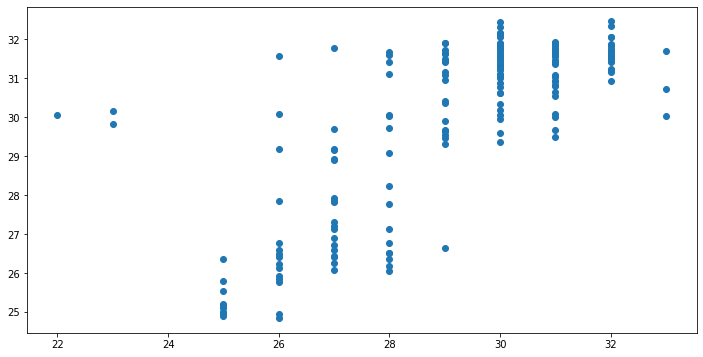

In [54]:

plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds)

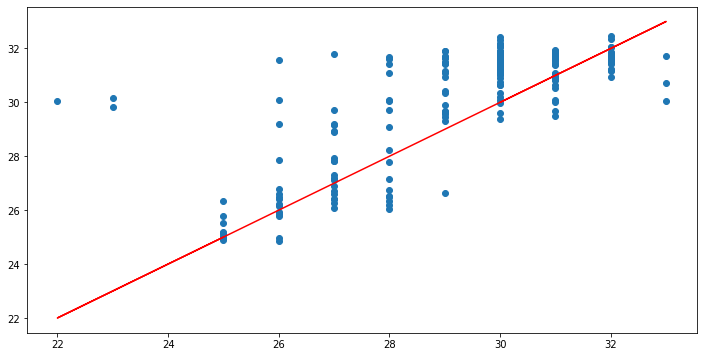

In [55]:
#Make a line
plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds)
plt.plot(y_valid, y_valid, 'r')

# **Custom Data Predictions**

* We will predict a new TMAX depending upon A new year 

Put Year, Month and Date below

In [137]:
# Here 2020 is the year, 12 is the month and 11 is the day of the date
New_year_to_predict_tmax = [[2020,12,11]]
Custom_tmax_preds = ideal_model.predict(New_year_to_predict_tmax)
print(f' Predicted Maximum Temperature (TMAX) is:  {Custom_tmax_preds[0]:.2f}°C' )

 Predicted Maximum Temperature (TMAX) is:  31.25°C


# Predicting TMIN

In [57]:
df_tmin = df.copy()

In [58]:
df_tmin

,DATE,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,RAIN
0,2008-07-01,30,26,94,1.6,1001,True
1,2008-07-02,31,26,93,0.8,1001,True
2,2008-07-03,29,26,95,0.0,1001,False
3,2008-07-04,32,26,91,0.0,1001,False
4,2008-07-05,31,26,93,0.0,1000,False
...,...,...,...,...,...,...,...
4541,2020-12-06,31,21,50,0.0,1014,False
4542,2020-12-07,29,21,49,0.0,1015,False
4543,2020-12-08,30,23,51,0.0,1014,False
4544,2020-12-09,30,22,51,0.0,1013,False


## Add datetime parameters for date column

In [59]:
df_tmin["Year"] = df_tmin.DATE.dt.year
df_tmin["Month"] = df_tmin.DATE.dt.month
df_tmin["Day"] = df_tmin.DATE.dt.day

In [60]:
df_tmin.head().T

,0,1,2,3,4
DATE,2008-07-01 00:00:00,2008-07-02 00:00:00,2008-07-03 00:00:00,2008-07-04 00:00:00,2008-07-05 00:00:00
TMAX,30,31,29,32,31
TMIN,26,26,26,26,26
HUMIDITY,94,93,95,91,93
PRCP,1.6,0.8,0,0,0
PRESSURE,1001,1001,1001,1001,1000
RAIN,True,True,False,False,False
Year,2008,2008,2008,2008,2008
Month,7,7,7,7,7
Day,1,2,3,4,5


In [61]:
# Now that we've enriched our DataFrame with date time features, we can remove DATE and RAIN column

df_tmin.drop("DATE", axis=1, inplace=True)

In [62]:
df_tmin.drop("RAIN", axis=1, inplace=True)

In [63]:
# Check the values of different columns
df_tmin

,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,Year,Month,Day
0,30,26,94,1.6,1001,2008,7,1
1,31,26,93,0.8,1001,2008,7,2
2,29,26,95,0.0,1001,2008,7,3
3,32,26,91,0.0,1001,2008,7,4
4,31,26,93,0.0,1000,2008,7,5
...,...,...,...,...,...,...,...,...
4541,31,21,50,0.0,1014,2020,12,6
4542,29,21,49,0.0,1015,2020,12,7
4543,30,23,51,0.0,1014,2020,12,8
4544,30,22,51,0.0,1013,2020,12,9


In [64]:
df_tmin.head()

,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,Year,Month,Day
0,30,26,94,1.6,1001,2008,7,1
1,31,26,93,0.8,1001,2008,7,2
2,29,26,95,0.0,1001,2008,7,3
3,32,26,91,0.0,1001,2008,7,4
4,31,26,93,0.0,1000,2008,7,5


In [65]:
len(df_tmin)

4546

In [66]:
df_tmin.columns

Index(['TMAX', 'TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE', 'Year', 'Month', 'Day'], dtype='object')

In [67]:
df_tmin = df_tmin.drop(['TMAX', 'HUMIDITY', 'PRCP', 'PRESSURE'], axis=1)

In [68]:
df_tmin

,TMIN,Year,Month,Day
0,26,2008,7,1
1,26,2008,7,2
2,26,2008,7,3
3,26,2008,7,4
4,26,2008,7,5
...,...,...,...,...
4541,21,2020,12,6
4542,21,2020,12,7
4543,23,2020,12,8
4544,22,2020,12,9


# Model Creation

In [69]:
# Let's build a machine learning model
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state= 42)
model.fit(df_tmin.drop("TMIN", axis=1), df_tmin["TMIN"])

CPU times: user 907 ms, sys: 27.6 ms, total: 935 ms
Wall time: 558 ms


In [70]:
# Score the model
model_score= model.score(df_tmin.drop("TMIN", axis=1), df_tmin["TMIN"])
print(f'Model score is:  {model_score*100:.2f}')

Model score is:  99.32


In [71]:
df_tmin.Year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
4541    2020
4542    2020
4543    2020
4544    2020
4545    2020
Name: Year, Length: 4546, dtype: int64

In [72]:
df_tmin.Year.value_counts()


2016    366
2012    366
2019    365
2015    365
2011    365
2018    365
2014    365
2010    365
2017    365
2013    365
2009    365
2020    345
2008    184
Name: Year, dtype: int64

In [73]:
# Split data into train and validation
df_val = df_tmin[df_tmin.Year == 2008 ]
df_train = df_tmin[df_tmin.Year != 2008]

len(df_val), len(df_train)

(184, 4362)

In [74]:
# Splitting data into X and y
X_train, y_train = df_train.drop("TMIN", axis=1), df_train.TMIN
X_valid, y_valid = df_val.drop("TMIN", axis=1), df_val.TMIN

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4362, 3), (4362,), (184, 3), (184,))

In [75]:
y_train

184     16
185     15
186     14
187     13
188     13
        ..
4541    21
4542    21
4543    23
4544    22
4545    23
Name: TMIN, Length: 4362, dtype: int64

**Building an evaluation function**

In [76]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different Levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2-Score": r2_score(y_train, train_preds),
              "Valid R^2-Score": r2_score(y_valid, val_preds)}
    return scores

In [77]:
# Because the length of the X_train is really high

print(f'Length of the X_train set: {len(X_train)}')

Length of the X_train set: 4362


In [78]:

# Change max_samples value to make the process faster.
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=1000)

In [79]:
%%time

# Cutting down on the maxx number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 411 ms, sys: 18.3 ms, total: 429 ms
Wall time: 372 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [80]:
print(f'the model is {(X_train.shape[0]) * 100 / 1000000} times faster')

the model is 0.4362 times faster


In [81]:
%%time

# Model with ideal hyperparameter tuning

ideal_model_tmin = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model_tmin.fit(X_train, y_train)

CPU times: user 160 ms, sys: 7.89 ms, total: 168 ms
Wall time: 126 ms


In [82]:
# Score for idea_model (trained on all the data)
show_score(ideal_model_tmin)

{'Training MAE': 0.8341153970775096,
 'Training RMSLE': 0.0557527151899355,
 'Training R^2-Score': 0.9429927448159902,
 'Valid MAE': 0.8528288456497692,
 'Valid RMSLE': 0.057871609051907524,
 'Valid R^2-Score': 0.9066184271909903}

### Make Prediction on test data

In [83]:
test_preds_tmin = ideal_model_tmin.predict(X_valid)

In [84]:
test_preds_tmin

array([25.62243429, 25.85023163, 25.94536524, 26.1367503 , 26.10014302,
       26.01709838, 26.00662885, 26.11725812, 25.80949299, 25.97581482,
       26.04238562, 25.59614792, 25.7786778 , 25.91694338, 25.7440288 ,
       25.77570111, 25.9260825 , 26.07486663, 25.86552532, 25.64060733,
       25.63866223, 25.88959123, 25.99628482, 25.95357676, 25.90237595,
       25.87885904, 25.53525088, 25.8375565 , 25.89248853, 25.87516577,
       25.23725635, 25.74373001, 26.00996952, 26.12688267, 26.33858023,
       26.30197295, 26.22874974, 26.18860874, 26.30645527, 25.97870387,
       26.00353306, 26.02282031, 25.49956545, 25.69931024, 25.66835936,
       25.51844949, 25.56808249, 25.60159763, 25.66996966, 25.47287082,
       25.18656388, 25.1693229 , 25.33209671, 25.4371427 , 25.38826948,
       25.20770935, 25.25825243, 24.85743389, 25.21361116, 25.43905392,
       25.5924904 , 24.94889916, 25.48465897, 25.59454262, 25.6929285 ,
       25.67573657, 25.69990129, 25.51331378, 25.42929651, 25.57

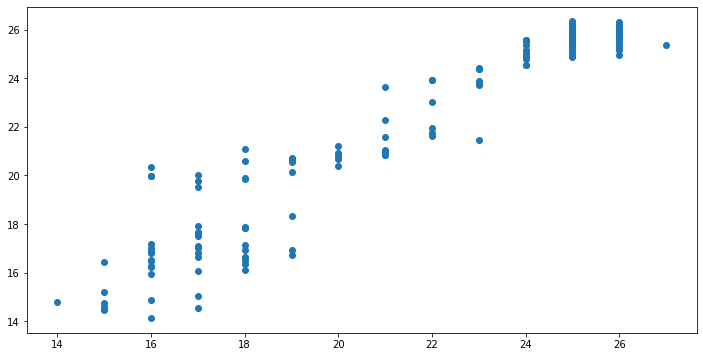

In [85]:

plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_tmin)

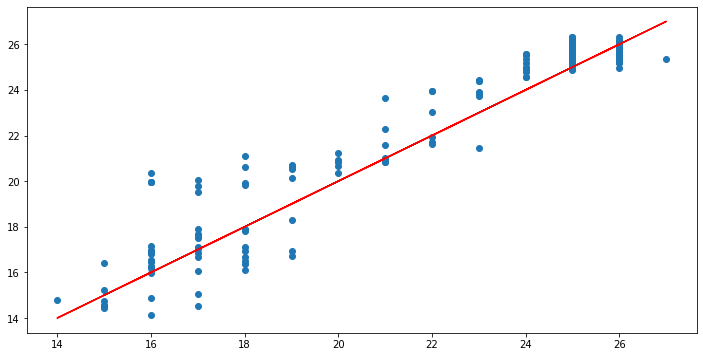

In [86]:
#Make a line
plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_tmin)
plt.plot(y_valid, y_valid, 'r')

# **Custom Data Predictions**

* We will predict a new TMIN depending upon A new year 

Put Year, Month and Date below

In [87]:
# Here 2020 is the year, 12 is the month and 11 is the day of the date
New_year_to_predict_tmin = [[2020,12,11]]
Custom_tmin_preds = ideal_model_tmin.predict(New_year_to_predict_tmin)
print(f' Predicted Minimum Temperature (TMIN) is:  {Custom_tmin_preds[0]:.2f}°C' )

 Predicted Minimum Temperature (TMIN) is:  22.81°C


# Predicting HUMIDITY

In [88]:
df_humid = df.copy()

In [89]:
df_humid

,DATE,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,RAIN
0,2008-07-01,30,26,94,1.6,1001,True
1,2008-07-02,31,26,93,0.8,1001,True
2,2008-07-03,29,26,95,0.0,1001,False
3,2008-07-04,32,26,91,0.0,1001,False
4,2008-07-05,31,26,93,0.0,1000,False
...,...,...,...,...,...,...,...
4541,2020-12-06,31,21,50,0.0,1014,False
4542,2020-12-07,29,21,49,0.0,1015,False
4543,2020-12-08,30,23,51,0.0,1014,False
4544,2020-12-09,30,22,51,0.0,1013,False


## Add datetime parameters for date column

In [90]:
df_humid["Year"] = df_humid.DATE.dt.year
df_humid["Month"] = df_humid.DATE.dt.month
df_humid["Day"] = df_humid.DATE.dt.day

In [91]:
df_humid.head().T

,0,1,2,3,4
DATE,2008-07-01 00:00:00,2008-07-02 00:00:00,2008-07-03 00:00:00,2008-07-04 00:00:00,2008-07-05 00:00:00
TMAX,30,31,29,32,31
TMIN,26,26,26,26,26
HUMIDITY,94,93,95,91,93
PRCP,1.6,0.8,0,0,0
PRESSURE,1001,1001,1001,1001,1000
RAIN,True,True,False,False,False
Year,2008,2008,2008,2008,2008
Month,7,7,7,7,7
Day,1,2,3,4,5


In [92]:
df_humid.columns

Index(['DATE', 'TMAX', 'TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE', 'RAIN', 'Year',
       'Month', 'Day'],
      dtype='object')

In [93]:
df_humid = df_humid.drop(['DATE', 'TMAX', 'TMIN', 'PRCP', 'PRESSURE', 'RAIN'], axis=1)

In [94]:
df_humid

,HUMIDITY,Year,Month,Day
0,94,2008,7,1
1,93,2008,7,2
2,95,2008,7,3
3,91,2008,7,4
4,93,2008,7,5
...,...,...,...,...
4541,50,2020,12,6
4542,49,2020,12,7
4543,51,2020,12,8
4544,51,2020,12,9


# Model Creation

In [95]:
# Let's build a machine learning model
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state= 42)
model.fit(df_humid.drop("HUMIDITY", axis=1), df_humid["HUMIDITY"])

CPU times: user 916 ms, sys: 37.6 ms, total: 954 ms
Wall time: 646 ms


In [96]:
# Score the model
model_score= model.score(df_humid.drop("HUMIDITY", axis=1), df_humid["HUMIDITY"])
print(f'Model score is:  {model_score*100:.2f}')

Model score is:  98.60


In [97]:
# Split data into train and validation
df_val = df_humid[df_humid.Year == 2008 ]
df_train = df_humid[df_humid.Year != 2008]

len(df_val), len(df_train)

(184, 4362)

In [98]:
# Splitting data into X and y
X_train, y_train = df_train.drop("HUMIDITY", axis=1), df_train.HUMIDITY
X_valid, y_valid = df_val.drop("HUMIDITY", axis=1), df_val.HUMIDITY

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4362, 3), (4362,), (184, 3), (184,))

### Building an evaluation function

In [99]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different Levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2-Score": r2_score(y_train, train_preds),
              "Valid R^2-Score": r2_score(y_valid, val_preds)}
    return scores

In [100]:
# Because the length of the X_train is really high

print(f'Length of the X_train set: {len(X_train)}')

Length of the X_train set: 4362


In [101]:

# Change max_samples value to make the process faster.
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=1000)

In [102]:
%%time

# Cutting down on the maxx number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 419 ms, sys: 32.7 ms, total: 452 ms
Wall time: 366 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [103]:
print(f'the model is {(X_train.shape[0]) * 100 / 1000000} times faster')

the model is 0.4362 times faster


In [104]:
%%time

# Model with ideal hyperparameter tuning

ideal_model_humid = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model_humid.fit(X_train, y_train)

CPU times: user 154 ms, sys: 13 ms, total: 167 ms
Wall time: 127 ms


In [105]:
# Score for idea_model (trained on all the data)
show_score(ideal_model_humid)

{'Training MAE': 4.379102959872693,
 'Training RMSLE': 0.10845999779802659,
 'Training R^2-Score': 0.8578208534749614,
 'Valid MAE': 4.632858872608644,
 'Valid RMSLE': 0.06484852597549501,
 'Valid R^2-Score': 0.6007873551698576}

### Make Prediction on test data

In [106]:
test_preds_humid = ideal_model_humid.predict(X_valid)

In [107]:
test_preds_humid

array([83.52956597, 85.81969663, 86.82911423, 88.34798251, 88.15784563,
       88.61091235, 87.77570987, 87.42371444, 87.84636266, 86.43266066,
       86.1951946 , 86.16819472, 85.58246894, 87.93026259, 88.26019349,
       88.99593602, 88.35616667, 88.06020377, 87.51173539, 86.98345151,
       87.9531751 , 88.54347283, 88.23256852, 87.61151418, 86.77454748,
       86.15504737, 86.11530573, 86.87248876, 85.52550209, 85.84431461,
       84.49042546, 83.77317877, 86.30091384, 87.2163061 , 88.74548399,
       88.55534711, 88.99254261, 88.23493701, 87.88294158, 88.32940924,
       87.35532681, 87.18313853, 87.24173927, 87.00985527, 89.31289281,
       89.66549416, 90.67535228, 90.12787689, 89.7836997 , 89.16258022,
       88.76912791, 89.77431496, 89.95175968, 89.67312033, 88.99013417,
       87.70314926, 86.79923311, 86.68097866, 87.27887953, 85.59879543,
       85.87087184, 84.51094102, 83.63015138, 85.89847144, 87.14903616,
       88.60194652, 88.30686459, 88.8928322 , 88.19436122, 87.84

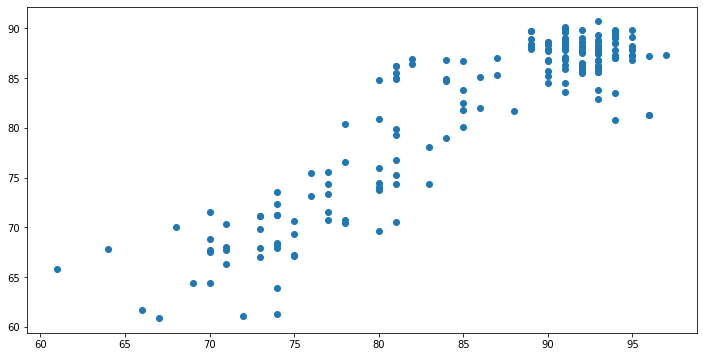

In [108]:

plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_humid)

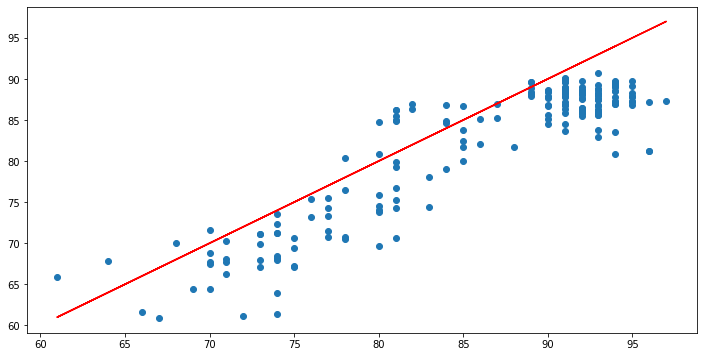

In [109]:
#Make a line
plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_humid)
plt.plot(y_valid, y_valid, 'r')

# **Custom Data Predictions**

* We will predict a new HUMIDITY depending upon A new year 



> Put Year, Month and Date below



In [110]:
# Here 2020 is the year, 12 is the month and 11 is the day of the date
New_year_to_predict_humid = [[2020,12,11]]
Custom_humid_preds = ideal_model_humid.predict(New_year_to_predict_humid)
print(f' Predicted HUMIDITY is:  {Custom_humid_preds[0]:.2f} %')

 Predicted HUMIDITY is:  53.44 %


# Predicting precipitation

In [111]:
df_prcp = df.copy()

In [112]:
df_prcp

,DATE,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,RAIN
0,2008-07-01,30,26,94,1.6,1001,True
1,2008-07-02,31,26,93,0.8,1001,True
2,2008-07-03,29,26,95,0.0,1001,False
3,2008-07-04,32,26,91,0.0,1001,False
4,2008-07-05,31,26,93,0.0,1000,False
...,...,...,...,...,...,...,...
4541,2020-12-06,31,21,50,0.0,1014,False
4542,2020-12-07,29,21,49,0.0,1015,False
4543,2020-12-08,30,23,51,0.0,1014,False
4544,2020-12-09,30,22,51,0.0,1013,False


## Add datetime parameters for date column

In [113]:
df_prcp["Year"] = df_prcp.DATE.dt.year
df_prcp["Month"] = df_prcp.DATE.dt.month
df_prcp["Day"] = df_prcp.DATE.dt.day

In [114]:
df_prcp

,DATE,TMAX,TMIN,HUMIDITY,PRCP,PRESSURE,RAIN,Year,Month,Day
0,2008-07-01,30,26,94,1.6,1001,True,2008,7,1
1,2008-07-02,31,26,93,0.8,1001,True,2008,7,2
2,2008-07-03,29,26,95,0.0,1001,False,2008,7,3
3,2008-07-04,32,26,91,0.0,1001,False,2008,7,4
4,2008-07-05,31,26,93,0.0,1000,False,2008,7,5
...,...,...,...,...,...,...,...,...,...,...
4541,2020-12-06,31,21,50,0.0,1014,False,2020,12,6
4542,2020-12-07,29,21,49,0.0,1015,False,2020,12,7
4543,2020-12-08,30,23,51,0.0,1014,False,2020,12,8
4544,2020-12-09,30,22,51,0.0,1013,False,2020,12,9


In [115]:
df_prcp.columns

Index(['DATE', 'TMAX', 'TMIN', 'HUMIDITY', 'PRCP', 'PRESSURE', 'RAIN', 'Year',
       'Month', 'Day'],
      dtype='object')

In [116]:
df_prcp = df_prcp.drop(['DATE', 'PRESSURE', 'RAIN'], axis=1)

In [117]:
df_prcp

,TMAX,TMIN,HUMIDITY,PRCP,Year,Month,Day
0,30,26,94,1.6,2008,7,1
1,31,26,93,0.8,2008,7,2
2,29,26,95,0.0,2008,7,3
3,32,26,91,0.0,2008,7,4
4,31,26,93,0.0,2008,7,5
...,...,...,...,...,...,...,...
4541,31,21,50,0.0,2020,12,6
4542,29,21,49,0.0,2020,12,7
4543,30,23,51,0.0,2020,12,8
4544,30,22,51,0.0,2020,12,9


Lets reformat colums to make it look good

In [118]:
#now 'age' will appear at the end of our df
df_prcp_ref = df_prcp[['Day','Month','Year','TMAX','TMIN','HUMIDITY','PRCP']]
df_prcp_ref.head()

,Day,Month,Year,TMAX,TMIN,HUMIDITY,PRCP
0,1,7,2008,30,26,94,1.6
1,2,7,2008,31,26,93,0.8
2,3,7,2008,29,26,95,0.0
3,4,7,2008,32,26,91,0.0
4,5,7,2008,31,26,93,0.0


# Model Creation

In [119]:
# Let's build a machine learning model
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state= 42)
model.fit(df_prcp_ref.drop("PRCP", axis=1), df_prcp_ref["PRCP"])

CPU times: user 1.59 s, sys: 20.7 ms, total: 1.61 s
Wall time: 950 ms


In [120]:
# Score the model
model_score= model.score(df_prcp_ref.drop("PRCP", axis=1), df_prcp_ref["PRCP"])
print(f'Model score is:  {model_score*100:.2f}')

Model score is:  89.97


In [121]:
# Split data into train and validation
df_val = df_prcp_ref[df_prcp_ref.Year == 2008 ]
df_train = df_prcp_ref[df_prcp_ref.Year != 2008]

len(df_val), len(df_train)

(184, 4362)

In [122]:
# Splitting data into X and y
X_train, y_train = df_train.drop("PRCP", axis=1), df_train.PRCP
X_valid, y_valid = df_val.drop("PRCP", axis=1), df_val.PRCP

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4362, 6), (4362,), (184, 6), (184,))

### Building an evaluation function

In [123]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different Levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2-Score": r2_score(y_train, train_preds),
              "Valid R^2-Score": r2_score(y_valid, val_preds)}
    return scores

In [124]:
# Because the length of the X_train is really high

print(f'Length of the X_train set: {len(X_train)}')

Length of the X_train set: 4362


In [125]:

# Change max_samples value to make the process faster.
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=1000)

In [126]:
%%time

# Cutting down on the maxx number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 590 ms, sys: 26.1 ms, total: 616 ms
Wall time: 459 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [127]:
%%time

# Model with ideal hyperparameter tuning

ideal_model_prcp = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model_prcp.fit(X_train, y_train)

CPU times: user 290 ms, sys: 9.61 ms, total: 300 ms
Wall time: 221 ms


In [128]:
# Score for idea_model (trained on all the data)
show_score(ideal_model_prcp)

{'Training MAE': 1.5067924088221325,
 'Training RMSLE': 0.5536845198610987,
 'Training R^2-Score': 0.6397049322476365,
 'Valid MAE': 2.013819619078128,
 'Valid RMSLE': 0.7766399169082656,
 'Valid R^2-Score': 0.12418349850181598}

### Make Prediction on test data

In [129]:
test_preds_prcp = ideal_model_prcp.predict(X_valid)

In [130]:
test_preds_prcp

array([6.52831128e+00, 6.07845984e+00, 6.35717620e+00, 3.84202209e+00,
       5.83633336e+00, 4.86851070e+00, 5.53877699e+00, 4.63175490e+00,
       4.34009866e+00, 2.88231845e+00, 4.02221901e+00, 3.20784918e+00,
       3.60017746e+00, 4.31277343e+00, 2.66117102e+00, 2.13165154e+00,
       1.86667316e+00, 3.55369513e+00, 2.06237481e+00, 3.86841835e+00,
       3.51329681e+00, 4.02395212e+00, 6.13136841e+00, 6.03349092e+00,
       5.32293359e+00, 3.26594535e+00, 5.02759811e+00, 2.80451189e+00,
       2.45934906e+00, 2.53613095e+00, 2.85111308e+00, 5.79214716e+00,
       3.81856363e+00, 6.24206355e+00, 5.45098331e+00, 6.15800355e+00,
       6.15800355e+00, 4.67005489e+00, 3.46644664e+00, 2.97891662e+00,
       4.65804280e+00, 4.53330523e+00, 4.27173517e+00, 4.27173517e+00,
       4.27173517e+00, 3.95211568e+00, 3.69491294e+00, 2.84061930e+00,
       4.27489154e+00, 4.43126276e+00, 3.63217859e+00, 4.69800910e+00,
       2.23934785e+00, 1.84182556e+00, 3.71935067e+00, 2.95771015e+00,
      

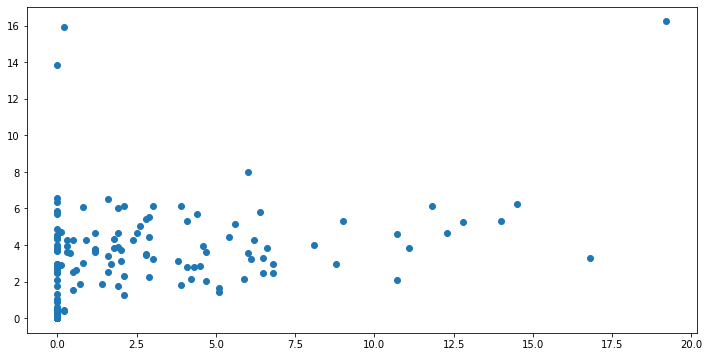

In [131]:

plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_prcp)

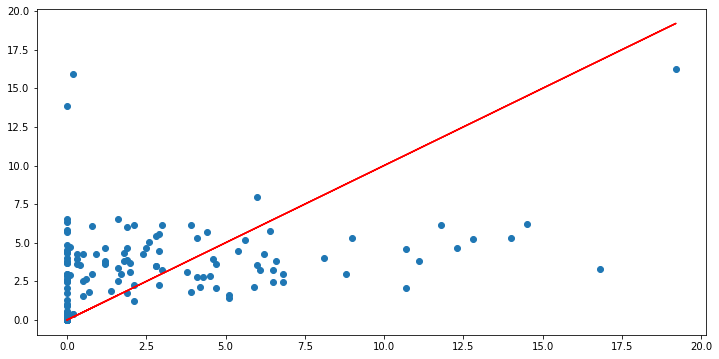

In [132]:
#Make a line
plt.figure(figsize=(12,6))
plt.scatter(y_valid, test_preds_prcp)
plt.plot(y_valid, y_valid, 'r')

# **Custom Data Predictions**

* We will predict a new precipitation depending upon A new year 



> Put Date,Month, Year, TMAX, TMIN, and HUMIDITY below



In [133]:
# Here 2020 is the year, 12 is the month and 11 is the day of the date
New_year_to_predict_prcp = [[11,12,2020,31.25,22.81,53.44]]
Custom_prcp_preds = ideal_model_prcp.predict(New_year_to_predict_prcp)
print(f' Predicted precipitation is:  {Custom_prcp_preds[0]:.2f} ')

 Predicted precipitation is:  0.03 
